## ResNet

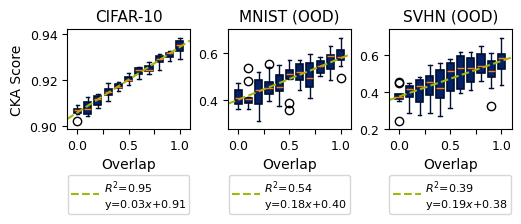

In [95]:
######### plotting for ResNet, dataset overlap


import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.patches import Patch
import numpy as np

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "cifar10"
# dataset = "cifar100"
# dataset = "tinyimagenet"

# Load data
df = pd.read_csv(f'./plotting_results/resnet_{dataset}_ds_platonic.csv')

# Define metrics and plot layout
plot_columns = ['metric_overlap', 'metric_ood_all_mnist', 'metric_ood_all_svhn']
overlap_name = None
if dataset == "cifar10":
    overlap_name = "CIFAR-10"
if dataset == "cifar100":
    overlap_name = "CIFAR-100"
if dataset == "tinyimagenet":
    overlap_name = "TinyImageNet"

metric_to_exp_dict = {
    'metric_overlap': overlap_name,
    'metric_ood_all_mnist': "MNIST (OOD)",
    'metric_ood_all_svhn': "SVHN (OOD)"
}
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(plot_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

frac_values = sorted(df['frac_overlap'].unique())
x_min, x_max = min(frac_values), max(frac_values)
padding = 0.1 * (x_max - x_min)
x_min -= padding
x_max += padding

for i, metric in enumerate(unique_metrics):
    df_metric = df[df['metric'] == metric]
    
    for j, col in enumerate(plot_columns):
        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][col].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5), 
        )

        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(metric_to_exp_dict[col], fontsize=11)

# Final layout
# fig.tight_layout()

fig.savefig(f"./plotting_final_figures/resnet_{dataset}_ds_overlap.pdf", bbox_inches='tight')
plt.show()

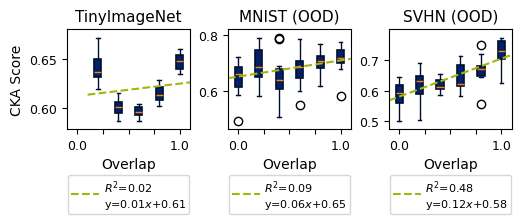

In [ ]:
######### plotting for ResNet, task overlap


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "cifar10"
# dataset = "cifar100"
# dataset = "tinyimagenet"

# Load data
df = pd.read_csv(f'./plotting_results/resnet_{dataset}_task_platonic.csv')

# Define metrics and plot layout
# plot_columns = ['metric_overlap', 'metric_ood_one', 'metric_ood_all_mnist', 'metric_ood_all_svhn']
plot_columns = ['metric_overlap', 'metric_ood_all_mnist', 'metric_ood_all_svhn']
overlap_name, non_overlap_name = None, None
if dataset == "cifar10":
    overlap_name, non_overlap_name = "CIFAR-10", "CIFAR-10 (OOD)"
if dataset == "cifar100":
    overlap_name, non_overlap_name = "CIFAR-100", "CIFAR-100 (OOD)"
if dataset == "tinyimagenet":
    overlap_name, non_overlap_name = "TinyImageNet", "TinyImageNet (OOD)"

metric_to_exp_dict = {
    'metric_overlap': overlap_name,
    'metric_ood_one': non_overlap_name,
    'metric_ood_all_mnist': "MNIST (OOD)",
    'metric_ood_all_svhn': "SVHN (OOD)"
}
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(plot_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

frac_values = sorted(df['frac_overlap'].unique())
x_min, x_max = min(frac_values), max(frac_values)
padding = 0.1 * (x_max - x_min)
x_min -= padding
x_max += padding


for i, metric in enumerate(unique_metrics):
    df_metric = df[df['metric'] == metric]
    
    for j, col in enumerate(plot_columns):
        ax = axes[j] if n_rows == 1 else axes[i, j]
        df_pruned = df_metric.copy()
        if col == "metric_ood_one":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 1]  # ood
            # x_vals = [0.0, 0.2, 0.4, 0.6, 0.8]
        elif col == "metric_overlap":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 0]  # overlap
            # x_vals = [0.2, 0.4, 0.6, 0.8, 1.0]
        
        data_to_plot = [df_pruned[df_pruned['frac_overlap'] == frac][col].values for frac in frac_values]
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )
        
        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        # raise ValueError("Make axes less wide, fix title (not CIFAR-10 for everything)")
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_pruned[['frac_overlap']].values
        y = df_pruned[col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(min(X)-padding, max(X)+padding, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(metric_to_exp_dict[col], fontsize=11)

# Final layout
# fig.tight_layout()
fig.savefig(f"./plotting_final_figures/resnet_{dataset}_task_overlap.pdf", bbox_inches='tight')
plt.show()

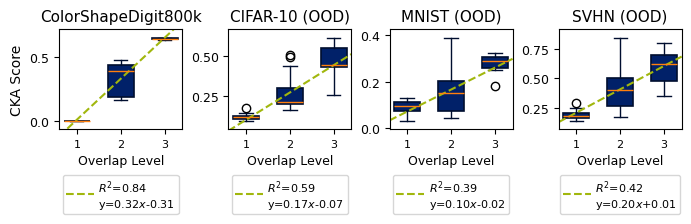

In [2]:
#### resnet partition

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("./plotting_results/resnet_partition_platonic.csv")

# New mapping: all partition2 combinations → "2"
partition_model_to_abbrev = {
    ('partition1', 'shape', 'digit'): "1",
    ('partition2', 'shape_color', 'digit_color'): "2",
    ('partition2', 'shape_digit', 'digit_color'): "2",
    ('partition2', 'shape_digit', 'shape_color'): "2",
    ('partition3', 'all0', 'all1'): "3"
}
x_order = ["1", "2", "3"]

# Apply mapping
df['x_label'] = df.apply(lambda row: partition_model_to_abbrev.get(
    (row['partition'], row['model0'], row['model1']), 'UNK'), axis=1)

# Filter and sort
df = df[df['x_label'].isin(x_order)]
df['x_label'] = pd.Categorical(df['x_label'], categories=x_order, ordered=True)

# Metric and value setup
metrics = ['cka']
value_columns = ['partition_metric', 'cifar10', 'mnist', 'svhn']
ds_to_full_ds_name_map = {'cifar10': "CIFAR-10 (OOD)", 'svhn': "SVHN (OOD)", 'mnist': "MNIST (OOD)", 
                          'partition_metric': 'ColorShapeDigit800k'}
metric_to_full_name = {"cka": "CKA Score"}

# Duke colors
duke_fill = '#012169'
duke_edge = '#000E2F'
duke_mean = '#7BAFD4'

# Subplots
n_rows = len(metrics)
n_cols = len(value_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

for row_idx, metric in enumerate(metrics):
    metric_df = df[df['metric'] == metric].copy()
    metric_df = metric_df.sort_values(by='x_label')

    for col_idx, value_col in enumerate(value_columns):
        ax = axes[row_idx, col_idx] if n_rows > 1 else axes[col_idx]

        # Group values by x_label (now just "1", "2", "3")
        grouped = metric_df.groupby('x_label', observed=False)[value_col].apply(list).reindex(x_order)
        x_labels = grouped.index.tolist()
        data_to_plot = grouped.values

        # Boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=np.array(list(range(len(x_labels))))+1,
            widths=0.6,
            patch_artist=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )

        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)

        ax.set_xticks(np.array(list(range(len(x_labels))))+1)
        ax.set_xticklabels(x_labels, rotation=0, fontsize=8)
        ax.tick_params(axis='y', labelsize=9)
        
        
        
        X = np.array([i+1 for i, group in enumerate(data_to_plot) for _ in group]).reshape(-1, 1)
        x_min, x_max = float(min(X.flatten())), float(max(X.flatten()))
        padding = (x_max - x_min) * 0.2
        x_min -= padding
        x_max += padding
        y = np.array([val for group in data_to_plot for val in group])
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * float(y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        ax.set_xlim(x_min, x_max)
        
        
        

        if row_idx == len(metrics) - 1:
            ax.set_xlabel("Overlap Level", fontsize=9)
        if col_idx == 0:
            ax.set_ylabel(metric_to_full_name.get(metric, metric), fontsize=10)
        else:
            ax.set_ylabel('')
        if row_idx == 0:
            ax.set_title(ds_to_full_ds_name_map[value_col], fontsize=11)

# fig.tight_layout()
fig.savefig(f"./plotting_final_figures/resnet_partition_combined.pdf", bbox_inches='tight')
plt.show()


In [ ]:
### accuracy (ResNet)

import pandas as pd

datasets = ["cifar10", "cifar100", "tinyimagenet"]
ds_to_text_dict = {"cifar10":"CIFAR-10", "cifar100":"CIFAR-100", "tinyimagenet":"TinyImageNet"}
results = []

# Load accuracy data
df_acc = pd.read_csv("./plotting_results/resnet_partition_platonic_acc.csv")  # Replace with your actual file path

# Define abbreviation mapping
partition_model_to_abbrev = {
    ('partition1', 'shape'): "P1: shape labels",
    ('partition1', 'digit'): "P1: digit labels",
    ('partition2', 'shape_color'): "P2: shape \\& color labels",
    ('partition2', 'digit_color'): "P2: digit \\& color labels",
    ('partition2', 'shape_digit'): "P2: shape \\& digit labels",
    ('partition3', 'all0'): "P3: shape, digit, \\& color labels",
    ('partition3', 'all1'): "P3: shape, digit, \\& color labels",
}

# Apply mapping to new column
df_acc['abbrev'] = df_acc.apply(lambda row: partition_model_to_abbrev.get((row['partition'], row['model']), 'UNK'), axis=1)

# Filter out unknowns (if any)
df_acc = df_acc[df_acc['abbrev'] != 'UNK']

# Group and summarize
summary = df_acc.groupby('abbrev')['acc'].agg(['mean', 'std']).reindex([
    "P1: shape labels",
    "P1: digit labels",
    "P2: shape \\& color labels",
    "P2: digit \\& color labels",
    "P2: shape \\& digit labels",
    "P3: shape, digit, \\& color labels",
])


for ds in datasets:
    task_df = pd.read_csv(f'./plotting_results/resnet_{ds}_task_platonic_acc.csv')
    task_df = task_df[task_df['acc'] != -1]
    task_mean = task_df['acc'].mean() * 100
    task_std = task_df['acc'].std() * 100

    ds_df = pd.read_csv(f'./plotting_results/resnet_{ds}_ds_platonic_acc.csv')
    ds_df = ds_df[ds_df['acc'] != -1]
    ds_mean = ds_df['acc'].mean() * 100
    ds_std = ds_df['acc'].std() * 100

    results.append((ds_to_text_dict[ds], f"{ds_mean:.2f} $\\pm$ {ds_std:.2f}", "NA", f"{task_mean:.2f} $\\pm$ {task_std:.2f}"))

for abbrev, row in summary.iterrows():
    # print(f"{abbrev}: mean = {row['mean']:.5f}, std = {row['std']:.5f}")
    results.append((abbrev, "NA", f"{row['mean']*100:.2f} $\\pm$ {row['std']*100:.2f}", f"NA"))

# Create DataFrame
table_df = pd.DataFrame(results, columns=["Dataset",  "Dataset Splitting", "Task Splitting", "Task + Dataset Splitting"])

# Format as LaTeX table
latex_table = table_df.to_latex(index=False, column_format="lccc")

print(latex_table)

\begin{tabular}{lcc}
\toprule
Dataset & Dataset Splitting & Task Splitting & Task + Dataset Splitting \\
\midrule
CIFAR-10 & 92.26 $\pm$ 0.20 & NA & 96.82 $\pm$ 1.36 \\
CIFAR-100 & 68.36 $\pm$ 0.34 & NA & 80.73 $\pm$ 1.70 \\
TinyImageNet & 45.99 $\pm$ 0.32 & NA & 60.75 $\pm$ 1.95 \\
P1: shape labels & NA & 99.05 $\pm$ 0.03 & NA \\
P1: digit labels & NA & 99.54 $\pm$ 0.05 & NA \\
P2: shape \& color labels & NA & 99.01 $\pm$ 0.02 & NA \\
P2: digit \& color labels & NA & 99.49 $\pm$ 0.04 & NA \\
P2: shape \& digit labels & NA & 98.66 $\pm$ 0.03 & NA \\
P3: shape, digit, \& color labels & NA & 98.53 $\pm$ 0.05 & NA \\
\bottomrule
\end{tabular}



## VAE

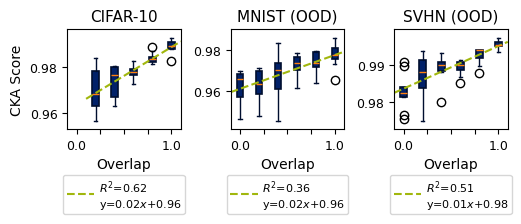

In [117]:
######### plotting for VAE, task overlap


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


dataset = "cifar10"

# Load data
df = pd.read_csv(f'./plotting_results/vae_platonic_task_{dataset}.csv')

# Define metrics and plot layout
# plot_columns = ['metric_overlap', 'metric_ood_one', 'metric_ood_all_mnist', 'metric_ood_all_svhn']
plot_columns = ['metric_overlap', 'metric_ood_all_mnist', 'metric_ood_all_svhn']
overlap_name, non_overlap_name = None, None
if dataset == "cifar10":
    overlap_name, non_overlap_name = "CIFAR-10", "CIFAR-10 (OOD)"

metric_to_exp_dict = {
    'metric_overlap': overlap_name,
    'metric_ood_one': non_overlap_name,
    'metric_ood_all_mnist': "MNIST (OOD)",
    'metric_ood_all_svhn': "SVHN (OOD)"
}
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(plot_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

frac_values = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

# frac_values = sorted(df['frac_overlap'].unique())
x_min, x_max = min(frac_values), max(frac_values)
padding = 0.1 * (x_max - x_min)
x_min -= padding
x_max += padding


for i, metric in enumerate(unique_metrics):
    df_metric = df[df['metric'] == metric]
    
    for j, col in enumerate(plot_columns):
        ax = axes[j] if n_rows == 1 else axes[i, j]
        
        df_pruned = df_metric.copy()
        if col == "metric_ood_one":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 1]  # ood
        elif col == "metric_overlap":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 0]  # overlap
        
        df_pruned = df_pruned[[x in frac_values for x in df_pruned["frac_overlap"]]]
        data_to_plot = [df_pruned[df_pruned['frac_overlap'] == frac][col].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )
        
        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        
        
        X = df_pruned[['frac_overlap']].values
        y = df_pruned[col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(min(X)-padding, max(X)+padding, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(metric_to_exp_dict[col], fontsize=11)

# Final layout
# fig.tight_layout()
fig.savefig(f"./plotting_final_figures/vae_{dataset}_task_overlap.pdf", bbox_inches='tight')
plt.show()

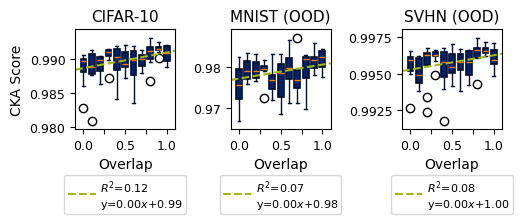

In [108]:
######### plotting for VAE, dataset overlap


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "cifar10"

# Load data
df = pd.read_csv(f'./plotting_results/vae_platonic_ds_{dataset}.csv')

# Define metrics and plot layout
plot_columns = ['metric_overlap', 'metric_ood_all_mnist', 'metric_ood_all_svhn']
overlap_name = None
if dataset == "cifar10":
    overlap_name = "CIFAR-10"

metric_to_exp_dict = {
    'metric_overlap': overlap_name,
    'metric_ood_all_mnist': "MNIST (OOD)",
    'metric_ood_all_svhn': "SVHN (OOD)"
}
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(plot_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

frac_values = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x_min, x_max = min(frac_values), max(frac_values)
padding = 0.1 * (x_max - x_min)
x_min -= padding
x_max += padding

for i, metric in enumerate(unique_metrics):
    df_metric = df[df['metric'] == metric]
    
    for j, col in enumerate(plot_columns):
        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][col].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )
        
        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(metric_to_exp_dict[col], fontsize=11)

# Final layout
# fig.tight_layout()
fig.savefig(f"./plotting_final_figures/vae_{dataset}_ds_overlap.pdf", bbox_inches='tight')
plt.show()

## nanoGPT

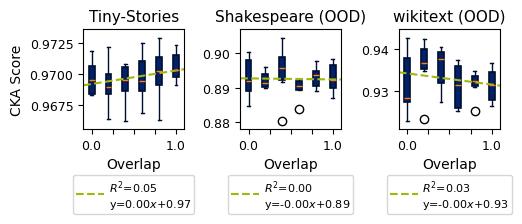

In [111]:
######### plotting for nanogpt, dataset overlap


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# dataset = "shakespeare"
dataset = "tinystories"

# Load data
df = pd.read_csv(f'./plotting_results/nanogpt_{dataset}_ds_platonic.csv')

plot_columns = None
metric_to_exp_dict = None
# Define metrics and plot layout
if dataset == "tinystories":
    plot_columns = ['metric_tinystories','metric_shakespeare','metric_wikitext']
    metric_to_exp_dict = {
        'metric_tinystories': "Tiny-Stories",
        'metric_wikitext': "wikitext (OOD)",
        'metric_shakespeare': "Shakespeare (OOD)"
    }
elif dataset == "shakespeare":
    plot_columns = ['metric_shakespeare','metric_tinystories','metric_wikitext']
    metric_to_exp_dict = {
        'metric_tinystories': "Tiny-Stories (OOD)",
        'metric_wikitext': "wikitext (OOD)",
        'metric_shakespeare': "Shakespeare"
    }
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(plot_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

frac_values = sorted(df['frac_overlap'].unique())
x_min, x_max = min(frac_values), max(frac_values)
padding = 0.1 * (x_max - x_min)
x_min -= padding
x_max += padding

for i, metric in enumerate(unique_metrics):
    df_metric = df[df['metric'] == metric]
    
    for j, col in enumerate(plot_columns):
        ax = axes[j] if n_rows == 1 else axes[i, j]
        data_to_plot = [df_metric[df_metric['frac_overlap'] == frac][col].values for frac in frac_values]
        
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )
        
        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        # ax.tick_params(axis='x', labelsize=9)
        
        
        
        X = df_metric[['frac_overlap']].values
        y = df_metric[col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        temp_y = [item for sublist in data_to_plot for item in sublist]
        y_min, y_max = min(temp_y), max(temp_y)
        y_padding = 0.1 * (y_max - y_min)
        y_min -= y_padding
        y_max += y_padding
        ax.set_ylim(y_min, y_max)
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(metric_to_exp_dict[col], fontsize=11)

# Final layout
# fig.tight_layout()
fig.savefig(f"./plotting_final_figures/nanogpt_{dataset}_ds_overlap.pdf", bbox_inches='tight')
plt.show()

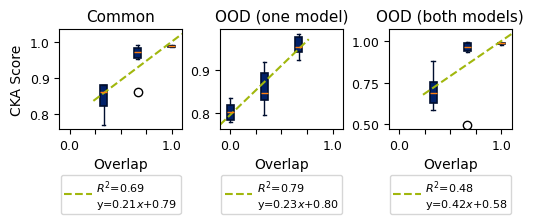

In [118]:
######### plotting for nanogpt, task overlap


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "all"

# Load data
df = pd.read_csv(f'./plotting_results/nanogpt_{dataset}_task_platonic.csv')

# Define metrics and plot layout
plot_columns = ['metric_common', 'metric_OOD_for_one', 'metric_OOD_for_all']

metric_to_exp_dict = {
    'metric_common': "Common",
    'metric_OOD_for_one': "OOD (one model)",
    'metric_OOD_for_all': "OOD (both models)",
}
unique_metrics = ['cka']

metric_to_full_metric_dict = {"cka":"CKA Score"}

# Duke colors
duke_fill = '#012169'   # Royal Blue
duke_edge = '#000E2F'   # Navy Blue
duke_mean = '#7BAFD4'   # Slate

# Prepare layout
n_rows = len(unique_metrics)
n_cols = len(plot_columns)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(1.7 * n_cols, 2.1 * n_rows), sharex=True, sharey=False, constrained_layout=True)

frac_values = sorted(df['frac_overlap'].unique())
x_min, x_max = min(frac_values), max(frac_values)
padding = 0.1 * (x_max - x_min)
x_min -= padding
x_max += padding


for i, metric in enumerate(unique_metrics):
    df_metric = df[df['metric'] == metric]
    
    for j, col in enumerate(plot_columns):
        ax = axes[j] if n_rows == 1 else axes[i, j]
        df_pruned = df_metric.copy()
        if col == "metric_OOD_for_one":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 1]  # ood
            # x_vals = [0.0, 0.2, 0.4, 0.6, 0.8]
        elif col == "metric_common" or col == "metric_OOD_for_all":
            df_pruned = df_pruned[df_pruned["frac_overlap"] != 0]  # overlap
            # x_vals = [0.2, 0.4, 0.6, 0.8, 1.0]
        
        data_to_plot = [df_pruned[df_pruned['frac_overlap'] == frac][col].values for frac in frac_values]
        # Custom boxplot
        bp = ax.boxplot(
            data_to_plot,
            positions=frac_values,
            widths=0.07,
            patch_artist=True,
            # showmeans=True,
            meanprops=dict(marker='o', markerfacecolor=duke_mean, markeredgecolor='black', markersize=5)
        )
        
        # Style each box
        for box in bp['boxes']:
            box.set_facecolor(duke_fill)
            box.set_edgecolor(duke_edge)
            box.set_linewidth(1.2)
        for whisker in bp['whiskers']:
            whisker.set_color(duke_edge)
            whisker.set_linewidth(1)
        for cap in bp['caps']:
            cap.set_color(duke_edge)
            cap.set_linewidth(1)
        ax.set_xticks(frac_values)
        ax.set_xticklabels([f"{frac:.1f}" for frac in frac_values], rotation=0, fontsize=9)
        ax.tick_params(axis='y', labelsize=9)
        ax.tick_params(axis='x', labelsize=9)
        
        
        X = df_pruned[['frac_overlap']].values
        y = df_pruned[col].values
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        slope = model.coef_[0]
        
        r_squared = r2_score(y, y_pred)
        x_line = np.linspace(min(X)-padding, max(X)+padding, 100).reshape(-1, 1)
        y_line = model.predict(x_line)
        ax.plot(x_line, y_line, linestyle='--', color='#A1B70D', linewidth=1.5,
            label=f"$R^2$={r_squared:.2f}\ny={slope:.2f}$x${'+' if model.intercept_ > 0 else '-'}{abs(model.intercept_):.2f}")
        ax.legend(
            fontsize=8,
            handlelength=2.5,
            handletextpad=0.4,
            borderpad=0.3,
            labelspacing=0.2,
            frameon=True,
            loc="upper center",
            bbox_to_anchor=(0.5, -0.4)  # center below the axis
        )
        
        
        ax.set_xlim(x_min, x_max)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        if i == len(unique_metrics) - 1:
            ax.set_xlabel('Overlap', fontsize=10)
        if j == 0:
            ax.set_ylabel(metric_to_full_metric_dict[metric], fontsize=10)
        else:
            ax.set_ylabel('')
        ax.set_title(metric_to_exp_dict[col], fontsize=11)

# Final layout
# fig.tight_layout()
fig.savefig(f"./plotting_final_figures/nanogpt_{dataset}_task_overlap.pdf", bbox_inches='tight')
plt.show()

# Regression and Mutual information computations.


## All ResNet

In [ ]:
###### mutual information and regression (task overlap, resnet)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "cifar10"
# dataset = "cifar100"
# dataset = "tinyimagenet"

# Load data
df = pd.read_csv(f'./plotting_results/resnet_{dataset}_task_platonic.csv')

# Filter to only CKA metric
cka_df = df[df['metric'] == 'cka']

# Target columns
target_columns = [
    'metric_overlap',
    'metric_ood_one',
    'metric_ood_all_mnist',
    'metric_ood_all_svhn'
]

results = {}
# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cka_df.copy()
    if target == "metric_ood_one":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
    elif target == "metric_overlap":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 0.0]
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values
    # Compute mutual information
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)

    results[target] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression/resnet_{dataset}_task_regression_mi.txt")

                      mutual_information  r_squared
metric_overlap                  0.570601   0.491251
metric_ood_one                  0.385066   0.043566
metric_ood_all_mnist            0.657451   0.687916
metric_ood_all_svhn             0.459034   0.559056
cifar10


In [ ]:
###### mutual information and regression (dataset overlap, resnet)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


dataset = "cifar10"
dataset = "cifar100"
dataset = "tinyimagenet"

# Load data
df = pd.read_csv(f'./plotting_results/resnet_{dataset}_ds_platonic.csv')

# Filter to only CKA metric
cka_df = df[df['metric'] == 'cka']

# Target columns
target_columns = [
    'metric_overlap',
    # 'metric_ood_one',
    'metric_ood_all_mnist',
    'metric_ood_all_svhn'
]

# Dictionary to store results
results = {}

# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cka_df.copy()
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values

    # Standardize (optional but helps stability)
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)
    
    results[target] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression/resnet_{dataset}_ds_regression_mi.txt")

                      mutual_information  r_squared
metric_overlap                  2.135741   0.976499
metric_ood_all_mnist            0.000000   0.058333
metric_ood_all_svhn             0.266208   0.330813
tinyimagenet


In [1]:
###### mutual information and regression (partitioned data, resnet)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv("./plotting_results/resnet_partition_platonic.csv")

# Only use rows where metric == 'cka'
cka_df = df[df['metric'] == 'cka'].copy()

# Map partition names to numerical x-axis values
partition_mapping = {
    'partition1': 0.0,
    'partition2': 0.5,
    'partition3': 1.0
}
cka_df['partition_x'] = cka_df['partition'].map(partition_mapping)

# Target columns to analyze
target_columns = ['cifar10', 'mnist', 'partition_metric', 'svhn']

# Results storage
results = {}

# Loop through each target
for target in target_columns:
    # Prepare x and y
    X = cka_df[['partition_x']].values
    y = cka_df[target].values

    # Compute R² using linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r_squared = model.score(X, y)

    # Compute mutual information
    X_scaled = StandardScaler().fit_transform(X)
    mi = mutual_info_regression(X_scaled, y, random_state=42)[0]

    results[target] = {
        'mutual_information': mi,
        'r_squared': r_squared
    }

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)
results_df.to_csv(f"./regression/resnet_partition_regression_mi.txt")

                  mutual_information  r_squared
cifar10                     0.612584   0.593298
mnist                       0.370760   0.391187
partition_metric            0.970626   0.835256
svhn                        0.310469   0.416380


## NanoGPT

In [ ]:
###### mutual information and regression (task overlap, gpt2)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "all"

# Load data
df = pd.read_csv(f'./plotting_results/nanogpt_{dataset}_task_platonic.csv')

# Filter to only CKA metric
cka_df = df[df['metric'] == 'cka']

# Target columns
target_columns = [
    'metric_common',
    'metric_OOD_for_one',
    'metric_OOD_for_all',
]

results = {}
# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cka_df.copy()
    if target == "metric_ood_one":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
    elif target == "metric_overlap":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 0.0]
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values
    # Compute mutual information
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)

    results[target] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression/gpt_{dataset}_task_regression_mi.txt")

                    mutual_information  r_squared
metric_common                 1.121246   0.657308
metric_OOD_for_one            1.073610   0.533744
metric_OOD_for_all            0.961905   0.704947
all


In [ ]:
###### mutual information and regression (ds overlap, gpt2)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# dataset = "shakespeare"
dataset = "tinystories"

# Load data
df = pd.read_csv(f'./plotting_results/nanogpt_{dataset}_ds_platonic.csv')

# Filter to only CKA metric
cka_df = df[df['metric'] == 'cka']

# Target columns
target_columns = None
metric_to_exp_dict = None
# Define metrics and plot layout
if dataset == "tinystories":
    target_columns = ['metric_tinystories','metric_shakespeare','metric_wikitext']
    metric_to_exp_dict = {
        'metric_tinystories': "Tiny-Stories",
        'metric_wikitext': "wikitext (OOD)",
        'metric_shakespeare': "Shakespeare (OOD)"
    }
elif dataset == "shakespeare":
    target_columns = ['metric_shakespeare','metric_tinystories','metric_wikitext']
    metric_to_exp_dict = {
        'metric_tinystories': "Tiny-Stories (OOD)",
        'metric_wikitext': "wikitext (OOD)",
        'metric_shakespeare': "Shakespeare"
    }
    
results = {}
# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cka_df.copy()
    if target == "metric_ood_one":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
    elif target == "metric_overlap":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 0.0]
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values
    # Compute mutual information
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)

    results[metric_to_exp_dict[target]] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression/gpt_{dataset}_ds_regression_mi.txt")

                   mutual_information  r_squared
Tiny-Stories                 0.000000   0.045366
Shakespeare (OOD)            0.000000   0.000444
wikitext (OOD)               0.172458   0.025909
tinystories


## VAE

In [5]:
###### mutual information and regression (task overlap, vae)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

dataset = "cifar10"

# Load data
df = pd.read_csv(f'./plotting_results/vae_platonic_task_{dataset}.csv')

# Filter to only CKA metric
cka_df = df[df['metric'] == 'cka']

# Target columns
target_columns = [
    'metric_overlap',
    'metric_ood_all_mnist',
    'metric_ood_all_svhn',
]

results = {}
# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cka_df.copy()
    if target == "metric_ood_one":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 1.0]
    elif target == "metric_overlap":
        df_pruned = df_pruned[df_pruned["frac_overlap"] != 0.0]
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values
    # Compute mutual information
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)

    results[target] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression/vae_{dataset}_task_regression_mi.txt")

                      mutual_information  r_squared
metric_overlap                  0.608151   0.581079
metric_ood_all_mnist            0.337892   0.336987
metric_ood_all_svhn             0.708123   0.524302
cifar10


In [4]:
###### mutual information and regression (dataset overlap, vae)

import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


dataset = "cifar10"

# Load data
df = pd.read_csv(f'./plotting_results/vae_platonic_ds_{dataset}.csv')

# Filter to only CKA metric
cka_df = df[df['metric'] == 'cka']

# Target columns
target_columns = [
    'metric_overlap',
    # 'metric_ood_one',
    'metric_ood_all_mnist',
    'metric_ood_all_svhn'
]

# Dictionary to store results
results = {}

# Loop over each target metric
for target in target_columns:
    # Copy and apply filtering
    df_pruned = cka_df.copy()
    
    # Input and target
    X = df_pruned[['frac_overlap']].values
    y = df_pruned[target].values

    # Standardize (optional but helps stability)
    mi = mutual_info_regression(X, y, random_state=42)
    
    # Linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    r_squared = r2_score(y, y_pred)
    
    results[target] = {'mutual_information': mi[0], 
                    #    'slope': slope,
        'r_squared': r_squared}

# Convert to DataFrame and print
results_df = pd.DataFrame(results).T
print(results_df)
print(dataset)
results_df.to_csv(f"./regression/vae_{dataset}_ds_regression_mi.txt")

                      mutual_information  r_squared
metric_overlap                  0.101109   0.116825
metric_ood_all_mnist            0.088215   0.066812
metric_ood_all_svhn             0.013929   0.080675
cifar10


### Compute mean mutual information and mean r^2 for task & dataset split & partition 

In [ ]:
import os
import pandas as pd
from collections import defaultdict

# Directory containing files
regression_dir = "./regression"

# Define groups
group_files = {
    'ds': [],
    'task': [],
    'partition': []
}

# Categorize files by group
for fname in os.listdir(regression_dir):
    if "_ds_" in fname:
        group_files['ds'].append(fname)
    elif "_task_" in fname:
        group_files['task'].append(fname)
    elif "_partition_" in fname:
        group_files['partition'].append(fname)

# Architecture inference
def get_architecture(filename):
    if "resnet" in filename:
        return "resnet"
    elif "vae" in filename:
        return "vae"
    elif "gpt" in filename:
        return "gpt"
    else:
        return "unknown"

# Compute weighted mean with two-level averaging
def compute_two_level_weighted_mean(filenames):
    # print(filenames)
    # First level: compute mean per file
    arch_grouped_avgs = defaultdict(list)
    
    for fname in filenames:
        path = os.path.join(regression_dir, fname)
        df = pd.read_csv(path, index_col=0)

        # Bottom-level mean: average across rows
        mean_mi = df['mutual_information'].mean()
        mean_r2 = df['r_squared'].mean()

        arch = get_architecture(fname)
        arch_grouped_avgs[arch].append((mean_mi, mean_r2))
    # print(dict(arch_grouped_avgs))
    # Second level: average per architecture, then equal weight average
    arch_mi_avgs = []
    arch_r2_avgs = []
    for arch in ['resnet', 'vae', 'gpt']:
        if arch_grouped_avgs[arch]:
            mi_vals, r2_vals = zip(*arch_grouped_avgs[arch])
            arch_mi_avgs.append(sum(mi_vals) / len(mi_vals))
            arch_r2_avgs.append(sum(r2_vals) / len(r2_vals))

    # Final equal-weighted means
    final_mi = sum(arch_mi_avgs) / len(arch_mi_avgs) if arch_mi_avgs else 0.0
    final_r2 = sum(arch_r2_avgs) / len(arch_r2_avgs) if arch_r2_avgs else 0.0
    return final_mi, final_r2

# Human-readable labels
label_map = {
    'ds': 'Dataset Overlap',
    'partition': 'Task Overlap',
    'task': 'Task + Dataset Overlap'
}

# Ordered keys
ordered_keys = ['ds', 'partition', 'task']

# Compute results
results = {}
for key in ordered_keys:
    mi, r2 = compute_two_level_weighted_mean(group_files[key])
    results[label_map[key]] = mi  # only mutual info for LaTeX table

# Create DataFrame with single row
latex_df = pd.DataFrame([results], index=['Mutual Information'])

# Insert row label column manually
# latex_df.index.name = 'Overlap Type'

# Output LaTeX table
print(latex_df.to_latex(index=True, float_format="%.3f", column_format="lccc"))

['gpt_tinystories_ds_regression_mi.txt', 'resnet_tinyimagenet_ds_regression_mi.txt', 'gpt_shakespeare_ds_regression_mi.txt', 'vae_cifar10_ds_regression_mi.txt', 'resnet_cifar10_ds_regression_mi.txt', 'resnet_cifar100_ds_regression_mi.txt']
['resnet_partition_regression_mi.txt']
['resnet_cifar10_task_regression_mi.txt', 'resnet_tinyimagenet_task_regression_mi.txt', 'vae_cifar10_task_regression_mi.txt', 'gpt_all_task_regression_mi.txt', 'resnet_cifar100_task_regression_mi.txt']
\begin{tabular}{lccc}
\toprule
 & Dataset Overlap & Task Overlap & Task + Dataset Overlap \\
\midrule
Mutual Information & 0.360 & 0.566 & 0.747 \\
\bottomrule
\end{tabular}

